In [18]:
acc = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {acc:.2f}%")
total_samples = len(df)
train_samples = len(X_train)
test_samples = len(X_test)

print("Train-Test Split Information")
print("-----------------------------")
print(f"Total Samples : {total_samples}")
print(f"Training Data : {train_samples} ({(train_samples/total_samples)*100:.0f}%)")
print(f"Testing Data  : {test_samples} ({(test_samples/total_samples)*100:.0f}%)")


Test Accuracy: 92.33%
Train-Test Split Information
-----------------------------
Total Samples : 60000
Training Data : 48000 (80%)
Testing Data  : 12000 (20%)


In [17]:
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=max_len)
    prediction = model.predict(pad)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"

print(predict_sentiment("This product is amazing and tastes great"))
print(predict_sentiment("Worst product I have ever bought"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Negative


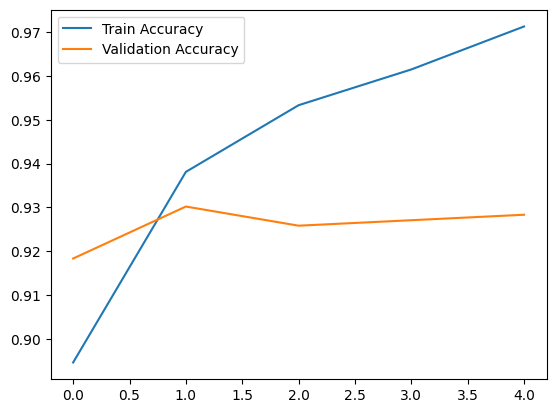

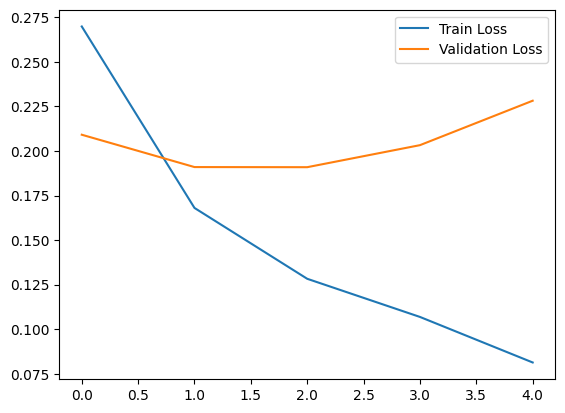

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


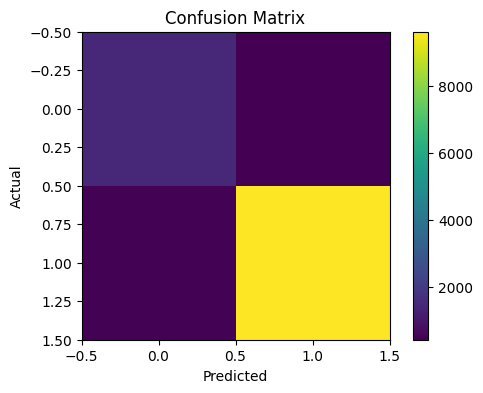

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
y_pred = (model.predict(X_test_pad) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 102ms/step
Accuracy: 0.92325

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1903
           1       0.96      0.95      0.95     10097

    accuracy                           0.92     12000
   macro avg       0.85      0.86      0.86     12000
weighted avg       0.92      0.92      0.92     12000



In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 304s 446ms/step - accuracy: 0.8686 - loss: 0.3410 - val_accuracy: 0.9183 - val_loss: 0.2091
Epoch 2/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 301s 445ms/step - accuracy: 0.9404 - loss: 0.1622 - val_accuracy: 0.9302 - val_loss: 0.1910
Epoch 3/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 297s 439ms/step - accuracy: 0.9557 - loss: 0.1223 - val_accuracy: 0.9258 - val_loss: 0.1909
Epoch 4/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 298s 442ms/step - accuracy: 0.9648 - loss: 0.1002 - val_accuracy: 0.9271 - val_loss: 0.2033
Epoch 5/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 309s 457ms/step - accuracy: 0.9733 - loss: 0.0776 - val_accuracy: 0.9283 - val_loss: 0.2282


In [10]:
model = Sequential([
    Embedding(10000, 128, input_length=max_len),
    LSTM(128),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [8]:
X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
df = df.sample(60000, random_state=42)


In [6]:
# Select required columns
df = df[['Text', 'Score']]

# Remove neutral reviews
df = df[df['Score'] != 3]

# Create sentiment column
df['sentiment'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

# Rename column
df.rename(columns={'Text': 'text'}, inplace=True)

# Remove nulls
df.dropna(inplace=True)

df.head()


,text,Score,sentiment
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


In [5]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/data/amazon_reviews.csv')
df = df[['Text', 'Score']]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [1]:
!pip install nltk tensorflow pandas matplotlib scikit-learn
